# Feature Scaling
1. Standardization and Normalization
2. Scaling to Minimum and Maximum
3. Scaling to Median and Quantiles
4. Guassian Transformation
5. Logarithmic Transformation
6. Reciprocal Transformation
7. Square Root Transformation
8. Exponential Transformation
9. Box Cox Transformation

### Need For Feature Scaling
1. Linear Regression --- Gradient Descent --- Global Minima
2. KNN, K Means, Hierarichal Clustering --- Eucledian Distance
3. ANN --- Gradient Descent --- Global Minima
4. CNN --- Gradient Descent --- Global Minima
5. RNN --- Gradient Descent --- Global Minima

## Standardization and Normalization

In [42]:
import pandas as pd 
import numpy as np 
df = pd.read_csv('titanic_train.csv',usecols=['Pclass','Age','Fare','Survived'])

In [2]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [3]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [4]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

#### fit vs fit_transform
To transform data we use fit_transform

In [7]:
df_scaled_std = scaler.fit_transform(df)

In [8]:
df_scaled_std

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [9]:
pd.DataFrame(df_scaled_std)

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [10]:
import matplotlib.pyplot as plt 
%matplotlib inline

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([-0.78927234, -0.58364612, -0.37801991, -0.17239369,  0.03323252,
         0.23885873,  0.44448495,  0.65011116,  0.85573737,  1.06136359,
         1.2669898 ]),
 <BarContainer object of 10 artists>)

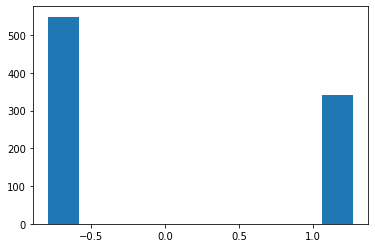

In [11]:
plt.hist(df_scaled_std[:,0])

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
df_scaled_minmax = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [15]:
df_scaled_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

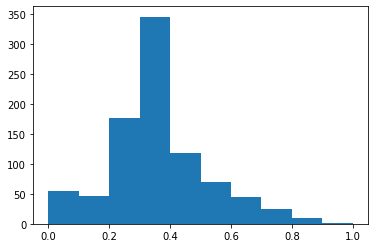

In [17]:
plt.hist(df_scaled_minmax['Age'])

## Robust Scaler
Used to scaled the feature to median and quantiles

IQR = 75th quantile - 25th quantile
x_scaled = (x - x.median) / IQR

In [18]:
from sklearn.preprocessing import RobustScaler

In [20]:
scaler = RobustScaler()

In [21]:
df_scaled_robust = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [23]:
df_scaled_robust.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([-2.12153846, -1.50938462, -0.89723077, -0.28507692,  0.32707692,
         0.93923077,  1.55138462,  2.16353846,  2.77569231,  3.38784615,
         4.        ]),
 <BarContainer object of 10 artists>)

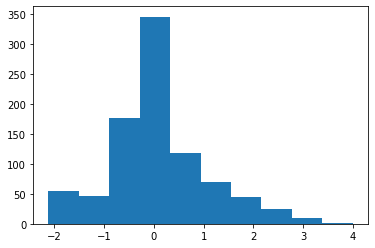

In [24]:
plt.hist(df_scaled_robust['Age'])

# Gaussian Transformation
Some Machine Learning Algorithms assume that features are normally distributed.<br>
They will give good performance and accuracy

In [28]:
df.drop('Pclass',inplace=True,axis=1)

In [29]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [31]:
import scipy.stats as stat 
import pylab

#### We use Q-Q Plot to check wether feature is normal distributed or not

In [40]:
def plot_data(df,feature):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

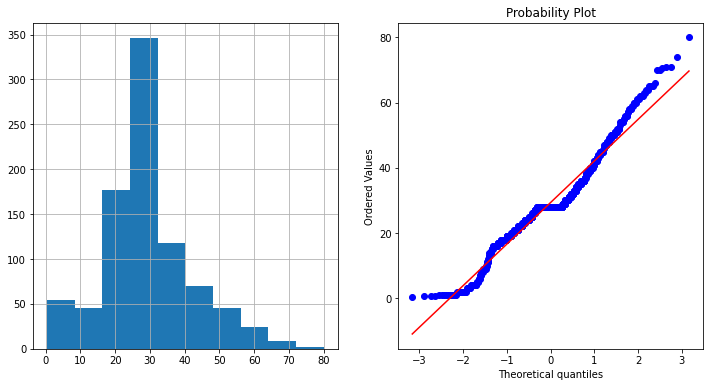

In [41]:
plot_data(df,'Age')

## Logarithmic Transformation
Works well if data is right/left - skewed

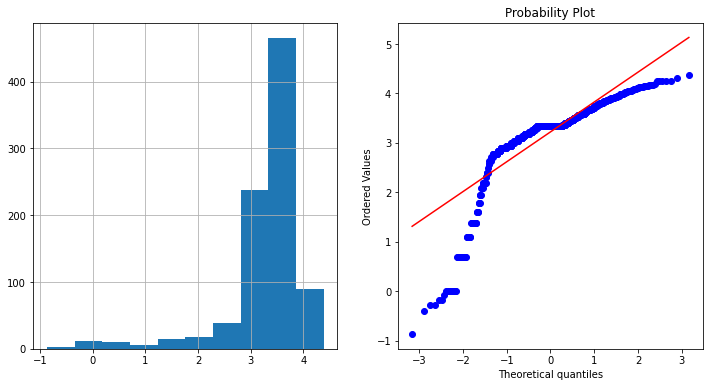

In [43]:
df['Age_log'] = np.log(df['Age'])
plot_data(df,'Age_log')

## Reciprocal Transformation

In [47]:
df['Age_reciprocal'] = 1 / df.Age

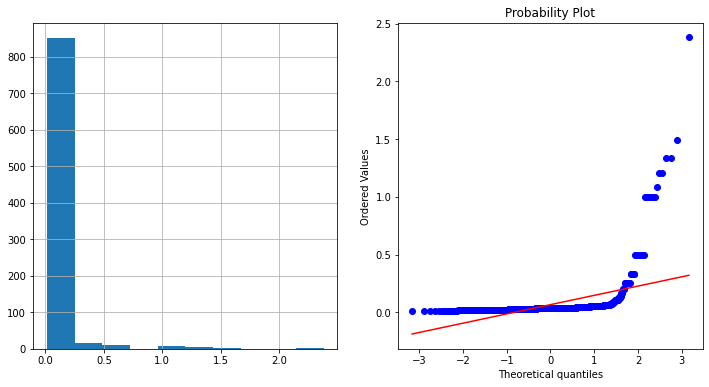

In [48]:
plot_data(df,'Age_reciprocal')

## Square Root Transformation

In [49]:
df['Age_sqr'] = df.Age ** (1/2)

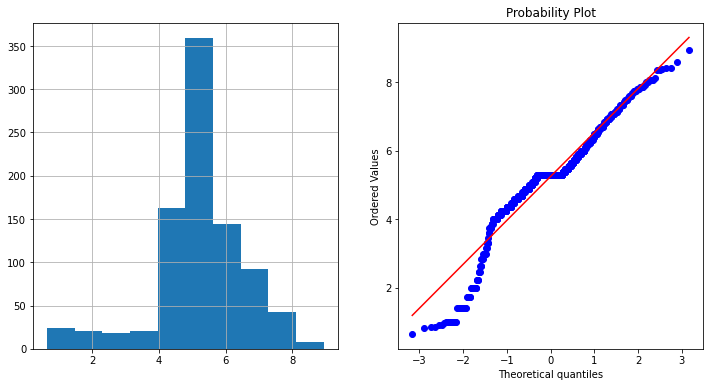

In [50]:
plot_data(df,'Age_sqr')

## Exponential Transformation

In [52]:
df['Age_exp'] = df.Age ** (1 / 1.2)

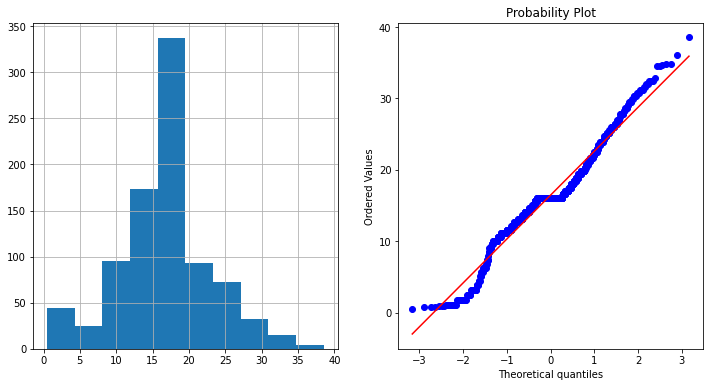

In [54]:
plot_data(df,'Age_exp')

## Box Cox Transformation
T(Y) = (Y exp(l)-1)/l <br>
Y is response variable <br>
l is the Transformation variable -5 to 5 <br>

In [57]:
df['Age_boxcox'],params = stat.boxcox(df['Age'])

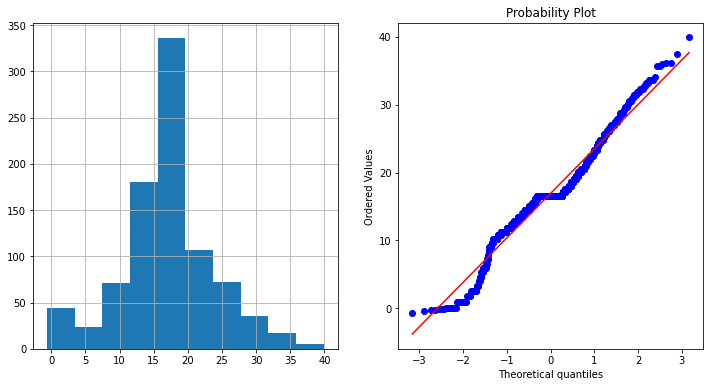

In [58]:
plot_data(df,'Age_boxcox')